<a href="https://colab.research.google.com/github/JuanDa14Sa/IAM/blob/main/Trabajo3_IAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea 3-Introducción al aprendizaje de maquina**

**Juan David Sánchez Murcia**

**Exercise 2.2**
*   a) Verifiquemos la cota en los tres casos:
*   i) Rayos positivos: Sabemos que estos tienen breakpoint en $k=2$, luego 
$$m_H(N)\leq \sum_{i=0}^1 \binom{N}{k}=1+N.$$

Calculando $m_H(N)$, tenemos que cada punto determina una región y además tenemos la región que no colorea ningún punto, por lo tanto $m_H(N)=1+N$, así que coincide con el teorema.

*   ii) Intervalos positivos: Sabemos que estos tienen breakpoint en $k=3$, luego 
$$m_H(N)\leq \sum_{i=0}^2 \binom{N}{k}=1+N+\frac{(N-1)(N)}{2}=1+\frac{N(N+1)}{2}.$$

Calculando $m_H(N)$, tenemos que cada intervalo se determina mediante dos puntos o por ningún punto, es decir puede ser un intervalo vacio, por lo que estamos escogiendo entre $N+1$ puntos una pareja, además tenemos el caso en el que ambos extremos del intervalo sean iguales, luego 

$$m_H(N)=\binom{N+1}{2}+1=1+\frac{N(N+1)}{2},$$

así que la cota del teorema es correcta.

*   iii) Conjuntos convexos: En este caso no hay breakpoint y $m_H(N)=2^N$.

*   b)  Supongamos que dicho conjunto de hipótesis existe, luego para $k=3$ se tiene 
$$m_H(3)=3+2^1=5\leq 2^3=8,$$
así que $k=3$ es un breakpoint, de donde usando el teorema para acotar $m_H$ tenemos que 
$$m_H(N)=N+2^{\lfloor N/2\rfloor}\leq 1+\frac{N(N+1)}{2}$$
sin embargo el lado izquierdo crece de forma exponencial, mientras que el lado derecho es un polinomio, así que para algún valor de $N$ no se va a tener el teorema. Concluimos que no puede existir dicho conjunto de hipótesis.


**Exercise 2.5**
Despejando $\delta$ de la cota VC tenemos que:
$$\delta=4(2N+1)e^{\frac{-0.1^2N}{8}}$$
y reemplazando $N=100$ tenemos $\delta=709.5275$, esto se da con probabilidad mayor o igual a $-708.5275$, es decir con probabilidad mayor o igual a $0$, así es una estimación mala.

**Exercise 2.6**
 *   a) Usando la cota de generalización o de error 
 $$E_{out}\leq E_{in}+\sqrt{\frac{1}{2N}ln\left(\frac{2M}{\delta}\right)}$$
 
 tenemos que el error en la fase de entrenamiento está acotado por $0.11$  y en la fase de testeo por $0.096$, por lo que es mayor en la fase de entrenamiento.

 *  b) Si reservamos más ejemplos para el test set entonces vamos a tener que reducir el número de ejemplos para el entrenamiento, y ya vimos el error en el testeo es más bajo, por lo tanto al reservar más ejemplos el testo podriamos terminar con un error bajo en el testo pero uno muy alto en el entrenamiento.


**Problem 2.1**
Si despejamos $N$ de la ecuación dada obtenemos:
$$ln\left(\frac{2M}{\delta}\right)\frac{1}{2\varepsilon^2}=N$$

así que reemplazando los valores dados en cada punto:
*   a) $N=839.94$ para $M=1$
*   b) $N=1760.97$ para $M=100$
*   c) $N=2682.009$ para $M=1000$

**Problem 2.12**

Desarollemos un código para dar un estimado de la muestra:

In [ ]:
import numpy as np
import math
dvc = 10
delta = 0.05
epsilon = 0.05
maxit=1000
initial_guess=1000
tol=5

def iterative_sample(initial_guess, dvc, delta, epsilon, maxit, tol):
    N = initial_guess
    for i in range(maxit):
        estimate = (8/epsilon**2) * np.log((4*(2*N)**(dvc)+1)/delta) 
        error = N - estimate
        if np.abs(error) <= tol:
            break
        N = math.ceil(estimate)
    return N

print('La estimación de la muestra es de: ', iterative_sample(initial_guess, dvc, delta, epsilon, maxit, tol))

La estimación de la muestra es de:  452957


**Problem 2.16**

*   a) Note que $$\sum_{i=0}^D c_ix^i$$ es un polinomio de grado $D$, así que dados cualesquiera $D+1$ puntos podemos interpolar un polinomio de grado $D$. Además como el polinomio tendrá $D$ raíces, podemos ver que al pasar de izquierda a la derecha de una raíz el signo va a cambiar, así que tendríamos $D+1$ espacios para ubicar nuestros $D+1$ puntos, así que podemos explicar todas las combinaciones y por lo tanto $D+1$ puntos son "separados" por $\mathcal{H}$.

*  b) Como el polinomio es de grado $D$, entonces para $D+2$ puntos solo hay $D$ raíces, así que deben haber dos puntos que caigan a la izquierda o a la derecha de una misma raíz, luego estos dos puntos tendran el mismo signo, de donde la hipótesis no puede explicar todas las combinaciones. De esto concluimos que la dimensión $VC$ es $D+1$ 

**Problem 2.20**

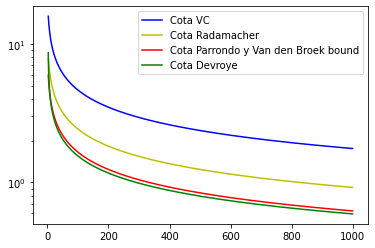

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from functools import partial



def growth_fun_(N,d):
  return N**d+1

growth_fun=partial(growth_fun_,d=dvc)

def vc_bound(delta,growth_fun,N):
  return np.sqrt((8/N) * np.log((4*growth_fun(2*N))/delta))

def rademacher(delta,growth_fun,N):
  return np.sqrt((2*np.log(2*N*growth_fun(N)))/N)+np.sqrt((2/N)*np.log(1/delta))+(1/N)

def parrondo_broek(delta,growth_fun,N):
  return (1+np.sqrt(1+N*np.log(6*growth_fun(2*N)/delta)))/N

def devroye(delta,growth_fun,N):
  return (1+np.sqrt(1+((N-2)/2)*np.log((4*growth_fun(N**2))/(delta))))/(N-2)

y_vc,y_rad,y_parr,y_dev=[],[],[],[]

dvc=50
delta=0.05
x= np.arange(3,1000)*1.0

for i in x:
  y_vc.append(vc_bound(delta,growth_fun,i))
  y_rad.append(rademacher(delta,growth_fun,i))
  y_parr.append(parrondo_broek(delta,growth_fun,i))
  y_dev.append(devroye(delta,growth_fun,i))

plt.plot(x,y_vc,color='b',label='Cota VC')
plt.plot(x,y_rad,color='y',label='Cota Radamacher')
plt.plot(x,y_parr,color='r',label='Cota Parrondo y Van den Broek ')
plt.plot(x,y_dev,color='g',label='Cota Devroye')
plt.yscale('log')
plt.legend()

La cota de Devroye y la cota de Parrondo y Van den Broek parecen ser las mejores.